In [22]:
!pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score ,recall_score

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from sklearn.svm import SVC
from keras.callbacks import EarlyStopping

from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow import keras

from numpy import average
from keras import backend as K
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from keras.models import load_model

from numpy import dstack
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from numpy import average

# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import ImageFilter
from IPython import display
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as python_random
import tensorflow as tf
import seaborn as sns
import math
from tensorflow.keras.layers import Dense, Dropout, Normalization, StringLookup, IntegerLookup
from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score, 
                             classification_report, confusion_matrix, ConfusionMatrixDisplay)

In [24]:
#from google.colab import drive
#drive.mount('/content/drive')

In [25]:
# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import ImageFilter

height, width = 224, 224
batch_size=100


def generate_data(DIR):
    datagen = ImageDataGenerator(rescale=1./255.)
    
    generator = datagen.flow_from_directory(
        DIR,
        batch_size=batch_size,
        shuffle=True,
        seed=42,
        class_mode='categorical',
        target_size=(height, width),
    )
    return generator
TRAINING_DIR = 'C:/Users/User3/Desktop/plant disease/Dataset_1/train/'
VALID_DIR = 'C:/Users/User3/Desktop/plant disease/Dataset_1/valid/'
TESTING_DIR = 'C:/Users/User3/Desktop/plant disease/Dataset_1/test/'

train_generator = generate_data(TRAINING_DIR)
valid_generator = generate_data(VALID_DIR)
test_generator = generate_data(TESTING_DIR)

#total_image = np.concatenate([train_generator.labels,test_generator.labels])
total_image = np.concatenate([train_generator.classes, test_generator.classes])



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 34 images belonging to 1 classes.


In [26]:
def generate_data_augmented(DIR):
    datagen = ImageDataGenerator(
        rescale=1./255.,
        zoom_range=0.2,
        rotation_range=90,
        width_shift_range=0.2,
        height_shift_range=0.2,shear_range=0.2,
        horizontal_flip = True, 
    )
    generator = datagen.flow_from_directory(
        DIR,
        batch_size=batch_size,
        seed=42,
        class_mode='categorical',
        target_size=(height, width),
        
    )
    return generator

aug_train_generator = generate_data_augmented(TRAINING_DIR)
aug_test_generator = generate_data_augmented(VALID_DIR)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [27]:
Epochs=20
BATCH_SIZE=100

In [28]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [29]:
dependencies = {'f1_m': f1_m ,'precision_m':precision_m,'recall_m':recall_m}

In [30]:
y_train = []
X_train = []

for i in range(math.ceil(len(train_generator.classes) / batch_size)):
    X_train.append(train_generator[i][0]) 
    y_train.append(train_generator[i][1])  # Append labels as 2D array

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)  # Convert to array and concatenate

y_test = []
X_test = []

for i in range(math.ceil(len(valid_generator.classes) / batch_size)):
    X_test.append(valid_generator[i][0]) 
    y_test.append(valid_generator[i][1])  # Append labels as 2D array

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [41]:
y_train = np.argmax(y_train, axis=1)  # Convert one-hot encoded labels to single label format
y_test = np.argmax(y_test, axis=1)    # Same for test labels


In [44]:
y_train.shape

(70295,)

In [45]:
from keras.models import load_model
model_vgg16= load_model('./model_1.h5',custom_objects=dependencies )
model_vgg19= load_model('./model_2.h5',custom_objects=dependencies )
model_resnet50= load_model('./model_3.h5',custom_objects=dependencies)
model_resnet101= load_model('./model_4.h5',custom_objects=dependencies)
model_inception_v3= load_model('./model_5.h5',custom_objects=dependencies )
model_DenseNet121 = load_model('./model_6.h5',custom_objects=dependencies )
model_DenseNet169 = load_model('./model_7.h5',custom_objects=dependencies )
model_MobileNet= load_model('./model_8.h5',custom_objects=dependencies )
model_MobileNetv2= load_model('./model_9.h5',custom_objects=dependencies )





In [46]:
members={'vgg16':model_vgg16,'vgg19':model_vgg19,'resnet50':model_resnet50,'resnet101':model_resnet101,
         'inception_v3':model_inception_v3, 'DenseNet121':model_DenseNet121,'DenseNet169':model_DenseNet169,
         'MobileNetv2':model_MobileNetv2,'MobileNet':model_MobileNet}

In [47]:
#members['vgg16'].summary()

In [48]:
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members,padded_train, padded_test, y_train,stack_Train, stack_Test,BATCH_SIZE,epoch):
    for key in members:     
        
        if key=='vgg16':
            #members['vgg16'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['vgg16'].predict(padded_train)
            yhat2 = members['vgg16'].predict(padded_test)
            
        elif key=='vgg19':
            #members['resnet50'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['vgg19'].predict(padded_train)
            yhat2 = members['vgg19'].predict(padded_test)

        elif key=='resnet50':
            #members['inception_v3'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['resnet50'].predict(padded_train)
            yhat2 = members['resnet50'].predict(padded_test)
        elif key=='resnet101':
            #members['DenseNet121'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['resnet101'].predict(padded_train)
            yhat2 = members['resnet101'].predict(padded_test)

        elif key=='inception_v3':
            #members['MobileNet'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['inception_v3'].predict(padded_train)
            yhat2 = members['inception_v3'].predict(padded_test)
        elif key=='DenseNet121':
            #members['inception_v3'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['DenseNet121'].predict(padded_train)
            yhat2 = members['DenseNet121'].predict(padded_test)
        elif key=='DenseNet169':
            #members['DenseNet121'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['DenseNet169'].predict(padded_train)
            yhat2 = members['DenseNet169'].predict(padded_test)

        elif key=='MobileNetv2':
            #members['MobileNet'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['MobileNetv2'].predict(padded_train)
            yhat2 = members['MobileNetv2'].predict(padded_test)
        elif key=='MobileNet':
            #members['MobileNet'].fit(padded_train, y_train, epochs=epoch, batch_size=BATCH_SIZE)
            yhat1 = members['MobileNet'].predict(padded_train)
            yhat2 = members['MobileNet'].predict(padded_test)
        if stack_Train is None:
            stack_Train = yhat1
        else:
            stack_Train = dstack((stack_Train, yhat1))
        
        if stack_Test is None:
            stack_Test = yhat2
        else:
            stack_Test = dstack((stack_Test, yhat2))
            
    stack_Train = stack_Train.reshape((stack_Train.shape[0], stack_Train.shape[1]*stack_Train.shape[2]))
    stack_Test = stack_Test.reshape((stack_Test.shape[0], stack_Test.shape[1]*stack_Test.shape[2]))
    return stack_Train, stack_Test




In [49]:
SFold = StratifiedKFold(n_splits=10,  shuffle=True,random_state=120)

In [37]:
SVM_DIC={'Accurcy':[], 'Precision': [],'Recall':[],'F1':[]}
LR_DIC={'Accurcy':[], 'Precision': [],'Recall':[],'F1':[]}
RF_DIC={'Accurcy':[], 'Precision': [],'Recall':[],'F1':[]}
SVM_DIC_Train={'Accurcy':[], 'Precision': [],'Recall':[],'F1':[],'SDAccurcy':[], 'SDPrecision': [],'SDRecall':[],'SDF1':[]}
LR_DIC_Train={'Accurcy':[], 'Precision': [],'Recall':[],'F1':[], 'SDAccurcy':[], 'SDPrecision': [],'SDRecall':[],'SDF1':[]}
RF_DIC_Train={'Accurcy':[], 'Precision': [],'Recall':[],'F1':[], 'SDAccurcy':[], 'SDPrecision': [],'SDRecall':[],'SDF1':[]}

stackX_Test=None
stackX_Train=None
stackX_Train,stackX_Test =stacked_dataset(members,X_train, X_test, y_train, stackX_Train, stackX_Test,BATCH_SIZE, Epochs)
  

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7969s 4s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 2472s 4s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9992s 5s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 2515s 5s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4018s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1002s 2s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7627s 3s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1911s 3s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2449s 1s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 608s 1s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3717s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 917s 2s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4554s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1130s 2s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4033s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 998s 2s/step
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 972s 441ms/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 244s 443ms/step


In [38]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='weighted'),
           'recall' : make_scorer(recall_score, average='weighted'), 
           'f1_score' : make_scorer(f1_score, average='weighted')}

# Support vector machine

In [39]:
from sklearn.multiclass import OneVsRestClassifier


In [50]:

#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#grid_search = GridSearchCV(estimator = OneVsRestClassifier(SVC()), param_grid = param_grid, cv = SFold) 
#grid_search.fit(stackX_Train, y_train)

#model_SVM = grid_search.best_estimator_     

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=SFold)
grid_search.fit(stackX_Train, y_train)
model_SVM = grid_search.best_estimator_



In [51]:
scores_Train_SVM = cross_validate(model_SVM, stackX_Train, y_train, scoring=scoring,  cv=SFold)
SVM_DIC_Train['Accurcy'].append(round(100*np.mean(scores_Train_SVM['test_accuracy']), 2))
SVM_DIC_Train['SDAccurcy'].append(round(100*np.std(scores_Train_SVM['test_accuracy']), 2))


SVM_DIC_Train['Precision'].append(round(100*np.mean(scores_Train_SVM['test_precision']), 2))
SVM_DIC_Train['SDPrecision'].append(round(100*np.std(scores_Train_SVM['test_precision']), 2))


SVM_DIC_Train['Recall'].append(round(100*np.mean(scores_Train_SVM['test_recall']), 2))
SVM_DIC_Train['SDRecall'].append(round(100*np.std(scores_Train_SVM['test_recall']), 2))


SVM_DIC_Train['F1'].append(round(100*np.mean(scores_Train_SVM['test_f1_score']), 2))
SVM_DIC_Train['SDF1'].append(round(100*np.std(scores_Train_SVM['test_f1_score']), 2))

yhat_SVM=model_SVM.predict(stackX_Test)

SVM_DIC['Accurcy'].append(round(100*accuracy_score(y_test, yhat_SVM), 2))
SVM_DIC['Precision'].append(round(100*precision_score(y_test, yhat_SVM,average='weighted'), 2))
SVM_DIC['Recall'].append(round(100*recall_score(y_test, yhat_SVM, average='weighted'), 2))
SVM_DIC['F1'].append(round(100*f1_score(y_test, yhat_SVM, average='weighted') , 2))     


In [53]:
print('SVM Train')

# Create a DataFrame with a single row for the new data
new_row = pd.DataFrame([{
    'AccuracyTrain': round(np.mean(SVM_DIC_Train['Accurcy']), 2),
    'PrecisionTrain': round(np.mean(SVM_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(SVM_DIC_Train['Recall']), 2),  
    'F1Train': round(np.mean(SVM_DIC_Train['F1']), 2)
}])

# Use pd.concat to add the row
finaltrain = pd.concat([finaltrain, new_row], ignore_index=True)

# Reindex the DataFrame columns
finaltrain = finaltrain.reindex(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

print(finaltrain)


SVM Train
   AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.85           99.86        99.85    99.85


In [54]:
print('SVM Train')
finaltrain = pd.DataFrame(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

# Creating a dictionary for the new row
finaltrain_row = {
    'AccuracyTrain': round(np.mean(SVM_DIC_Train['Accurcy']), 2),
    'PrecisionTrain': round(np.mean(SVM_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(SVM_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(SVM_DIC_Train['F1']), 2)
}

# Creating a DataFrame from the row and concatenating it with finaltrain
finaltrain = pd.concat([finaltrain, pd.DataFrame([finaltrain_row])], ignore_index=True)

# Reindexing to ensure the columns are in the correct order
finaltrain = finaltrain[['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train']]

print(finaltrain)

SVM Train
   AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.85           99.86        99.85    99.85


C:\Users\User3\AppData\Local\Temp\2\ipykernel_1364\1451366432.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  finaltrain = pd.concat([finaltrain, pd.DataFrame([finaltrain_row])], ignore_index=True)


In [56]:
print("SVM Test")

# Create a DataFrame with a single row for the new data
new_test_row = pd.DataFrame([{
    'AccuracyTest': round(np.mean(SVM_DIC['Accurcy']), 2),
    'PrecisionTest': round(np.mean(SVM_DIC['Precision']), 2),
    'RecallTest': round(np.mean(SVM_DIC['Recall']), 2),
    'F1Test': round(np.mean(SVM_DIC['F1']), 2)
}])

# Use pd.concat to add the row
ReultofTest = pd.concat([ReultofTest, new_test_row], ignore_index=True)

# Reindex the DataFrame columns
ReultofTest = ReultofTest.reindex(columns=['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test'])

print(ReultofTest)


SVM Test
   AccuracyTest  PrecisionTest  RecallTest  F1Test
0         99.77          99.77       99.77   99.77


In [57]:


print("SVM Test")
ReultofTest = pd.DataFrame(columns=['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test'])

# Creating a dictionary for the new row
ReultofTest_row = {
    'AccuracyTest': round(np.mean(SVM_DIC['Accurcy']), 2),
    'PrecisionTest': round(np.mean(SVM_DIC['Precision']), 2),
    'RecallTest': round(np.mean(SVM_DIC['Recall']), 2),
    'F1Test': round(np.mean(SVM_DIC['F1']), 2)
}

# Creating a DataFrame from the row and concatenating it with ReultofTest
ReultofTest = pd.concat([ReultofTest, pd.DataFrame([ReultofTest_row])], ignore_index=True)

# Reindexing to ensure the columns are in the correct order
ReultofTest = ReultofTest[['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test']]

print(ReultofTest)


SVM Test
   AccuracyTest  PrecisionTest  RecallTest  F1Test
0         99.77          99.77       99.77   99.77


C:\Users\User3\AppData\Local\Temp\2\ipykernel_1364\2369873175.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ReultofTest = pd.concat([ReultofTest, pd.DataFrame([ReultofTest_row])], ignore_index=True)


In [66]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for each class
yhat_probs = model_SVM.predict_proba(stackX_Test)

# Calculate AUROC using one-vs-rest and weighted averaging for multiclass
auroc = roc_auc_score(y_test, yhat_probs, multi_class="ovr", average="weighted")

print(f"AUROC: {auroc:.2f}")


AttributeError: This 'SVC' has no attribute 'predict_proba'

In [96]:

plt.figure(figsize=(12, 12))
hm = sns.heatmap(confusion_matrix(y_test,yhat_SVM), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Apple___Apple_scab', 
        'Apple___Black_rot', 
        'Apple___Cedar_apple_rust', 
        'Apple___healthy', 
        'Blueberry___healthy', 
        'Cherry_(including_sour)___Powdery_mildew', 
        'Cherry_(including_sour)___healthy', 
        'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 
        'Corn_(maize)___Common_rust_', 
        'Corn_(maize)___Northern_Leaf_Blight', 
        'Corn_(maize)___healthy', 
        'Grape___Black_rot', 
        'Grape___Esca_(Black_Measles)', 
        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
        'Grape___healthy', 
        'Orange___Haunglongbing_(Citrus_greening)', 
        'Peach___Bacterial_spot', 
        'Peach___healthy', 
        'Pepper,_bell___Bacterial_spot', 
        'Pepper,_bell___healthy', 
        'Potato___Early_blight', 
        'Potato___Late_blight', 
        'Potato___healthy', 
        'Raspberry___healthy', 
        'Soybean___healthy', 
        'Squash___Powdery_mildew', 
        'Strawberry___Leaf_scorch', 
        'Strawberry___healthy', 
        'Tomato___Bacterial_spot', 
        'Tomato___Early_blight', 
        'Tomato___Late_blight', 
        'Tomato___Leaf_Mold', 
        'Tomato___Septoria_leaf_spot', 
        'Tomato___Spider_mites_Two-spotted_spider_mite', 
        'Tomato___Target_Spot', 
        'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 
        'Tomato___Tomato_mosaic_virus', 
        'Tomato___healthy'],yticklabels=['Apple___Apple_scab', 
        'Apple___Black_rot', 
        'Apple___Cedar_apple_rust', 
        'Apple___healthy', 
        'Blueberry___healthy', 
        'Cherry_(including_sour)___Powdery_mildew', 
        'Cherry_(including_sour)___healthy', 
        'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 
        'Corn_(maize)___Common_rust_', 
        'Corn_(maize)___Northern_Leaf_Blight', 
        'Corn_(maize)___healthy', 
        'Grape___Black_rot', 
        'Grape___Esca_(Black_Measles)', 
        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
        'Grape___healthy', 
        'Orange___Haunglongbing_(Citrus_greening)', 
        'Peach___Bacterial_spot', 
        'Peach___healthy', 
        'Pepper,_bell___Bacterial_spot', 
        'Pepper,_bell___healthy', 
        'Potato___Early_blight', 
        'Potato___Late_blight', 
        'Potato___healthy', 
        'Raspberry___healthy', 
        'Soybean___healthy', 
        'Squash___Powdery_mildew', 
        'Strawberry___Leaf_scorch', 
        'Strawberry___healthy', 
        'Tomato___Bacterial_spot', 
        'Tomato___Early_blight', 
        'Tomato___Late_blight', 
        'Tomato___Leaf_Mold', 
        'Tomato___Septoria_leaf_spot', 
        'Tomato___Spider_mites_Two-spotted_spider_mite', 
        'Tomato___Target_Spot', 
        'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 
        'Tomato___Tomato_mosaic_virus', 
        'Tomato___healthy'])  
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
#print(classification_report(y_test,yhat_SVM))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

<Figure size 1200x1200 with 0 Axes>

In [ ]:
 'Apple___Apple_scab', 
        'Apple___Black_rot', 
        'Apple___Cedar_apple_rust', 
        'Apple___healthy', 
        'Blueberry___healthy', 
        'Cherry_(including_sour)___Powdery_mildew', 
        'Cherry_(including_sour)___healthy', 
        'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 
        'Corn_(maize)___Common_rust_', 
        'Corn_(maize)___Northern_Leaf_Blight', 
        'Corn_(maize)___healthy', 
        'Grape___Black_rot', 
        'Grape___Esca_(Black_Measles)', 
        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
        'Grape___healthy', 
        'Orange___Haunglongbing_(Citrus_greening)', 
        'Peach___Bacterial_spot', 
        'Peach___healthy', 
        'Pepper,_bell___Bacterial_spot', 
        'Pepper,_bell___healthy', 
        'Potato___Early_blight', 
        'Potato___Late_blight', 
        'Potato___healthy', 
        'Raspberry___healthy', 
        'Soybean___healthy', 
        'Squash___Powdery_mildew', 
        'Strawberry___Leaf_scorch', 
        'Strawberry___healthy', 
        'Tomato___Bacterial_spot', 
        'Tomato___Early_blight', 
        'Tomato___Late_blight', 
        'Tomato___Leaf_Mold', 
        'Tomato___Septoria_leaf_spot', 
        'Tomato___Spider_mites_Two-spotted_spider_mite', 
        'Tomato___Target_Spot', 
        'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 
        'Tomato___Tomato_mosaic_virus', 
        'Tomato___healthy'
    }

# Logitic regreession 

In [67]:

#param_grid = {"penalty":["l1","l2"], "C":np.logspace(0, 4, 10, -3,3,7) }
param_grid={"C":np.logspace(-3,3,7), "penalty":["l2"], "solver":['liblinear','newton-cg'],
                  'class_weight':[{ 0:0.95, 1:0.05 }, { 0:0.55, 1:0.45 }, { 0:0.45, 1:0.55 },{ 0:0.05, 1:0.95 }]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv = SFold ) 
grid_search.fit(stackX_Train, y_train)
LR = grid_search.best_estimator_




In [69]:
# Ensure dictionary keys are consistent
LR_DIC_Train = {'Accurcy': [], 'SDAccurcy': [], 'Precision': [], 'SDPrecision': [], 'Recall': [], 'SDRecall': [], 'F1': [], 'SDF1': []}
LR_DIC = {'Accurcy': [], 'Precision': [], 'Recall': [], 'F1': []}

# Calculating training metrics
scores_Train_LR = cross_validate(LR, stackX_Train, y_train, scoring=scoring, cv=SFold)
LR_DIC_Train['Accurcy'].append(round(100 * np.mean(scores_Train_LR['test_accuracy']), 2))
LR_DIC_Train['SDAccurcy'].append(round(100 * np.std(scores_Train_LR['test_accuracy']), 2))

LR_DIC_Train['Precision'].append(round(100 * np.mean(scores_Train_LR['test_precision']), 2))
LR_DIC_Train['SDPrecision'].append(round(100 * np.std(scores_Train_LR['test_precision']), 2))

LR_DIC_Train['Recall'].append(round(100 * np.mean(scores_Train_LR['test_recall']), 2))
LR_DIC_Train['SDRecall'].append(round(100 * np.std(scores_Train_LR['test_recall']), 2))

LR_DIC_Train['F1'].append(round(100 * np.mean(scores_Train_LR['test_f1_score']), 2))
LR_DIC_Train['SDF1'].append(round(100 * np.std(scores_Train_LR['test_f1_score']), 2))

# Predicting on test data
yhat_LR = cross_val_predict(LR, stackX_Test, y_test, cv=SFold)

# Calculating test metrics
LR_DIC['Accurcy'].append(round(100 * accuracy_score(y_test, yhat_LR), 2))
LR_DIC['Precision'].append(round(100 * precision_score(y_test, yhat_LR, average='weighted'), 2))
LR_DIC['Recall'].append(round(100 * recall_score(y_test, yhat_LR, average='weighted'), 2))
LR_DIC['F1'].append(round(100 * f1_score(y_test, yhat_LR, average='weighted'), 2))


In [71]:
print('RF Train')

# Create a DataFrame with a single row for the new data
new_train_row = pd.DataFrame([{
    'AccuracyTrain': round(np.mean(LR_DIC_Train['Accurcy']), 2),
    'PrecisionTrain': round(np.mean(LR_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(LR_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(LR_DIC_Train['F1']), 2)
}])

# Use pd.concat to add the row
finaltrain = pd.concat([finaltrain, new_train_row], ignore_index=True)

# Reindex the DataFrame columns
finaltrain = finaltrain.reindex(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

print(finaltrain)


RF Train
   AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.85           99.85        99.85    99.85


In [72]:


print('RF Train')
finaltrain = pd.DataFrame(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

# Creating a dictionary for the new row
finaltrain_row = {
    'AccuracyTrain': round(np.mean(LR_DIC_Train['Accurcy']), 2),
    'PrecisionTrain': round(np.mean(LR_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(LR_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(LR_DIC_Train['F1']), 2)
}

# Creating a DataFrame from the row and concatenating it with finaltrain
finaltrain = pd.concat([finaltrain, pd.DataFrame([finaltrain_row])], ignore_index=True)

# Reindexing to ensure the columns are in the correct order
finaltrain = finaltrain[['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train']]

print(finaltrain)


RF Train
   AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.85           99.85        99.85    99.85


C:\Users\User3\AppData\Local\Temp\2\ipykernel_1364\1341600655.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  finaltrain = pd.concat([finaltrain, pd.DataFrame([finaltrain_row])], ignore_index=True)


In [73]:
import pandas as pd
import numpy as np

print('RF Train')
finaltrain = pd.DataFrame(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

# Creating a dictionary for the new row
finaltrain_row = {
    'AccuracyTrain': round(np.mean(LR_DIC_Train['Accurcy']), 2),
    'PrecisionTrain': round(np.mean(LR_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(LR_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(LR_DIC_Train['F1']), 2)
}

# Creating a DataFrame from the row and concatenating it with finaltrain
finaltrain = pd.concat([finaltrain, pd.DataFrame([finaltrain_row])], ignore_index=True)

# Reindexing to ensure the columns are in the correct order
finaltrain = finaltrain[['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train']]

print(finaltrain)


RF Train
   AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.85           99.85        99.85    99.85


C:\Users\User3\AppData\Local\Temp\2\ipykernel_1364\4090918635.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  finaltrain = pd.concat([finaltrain, pd.DataFrame([finaltrain_row])], ignore_index=True)


In [82]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for each class
yhat_probs = LR.predict_proba(stackX_Test)

# Calculate AUROC with weighted average and one-vs-rest approach for multiclass
auroc = roc_auc_score(y_test, yhat_probs, multi_class="ovr", average="weighted")

print(f"AUROC: {auroc:.2f}")


AUROC: 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       497
           2       1.00      1.00      1.00       440
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       454
           5       1.00      1.00      1.00       421
           6       1.00      1.00      1.00       456
           7       0.97      0.98      0.98       410
           8       1.00      1.00      1.00       477
           9       0.98      0.97      0.98       477
          10       1.00      1.00      1.00       465
          11       1.00      1.00      1.00       472
          12       1.00      1.00      1.00       480
          13       1.00      1.00      1.00       430
          14       1.00      1.00      1.00       423
          15       1.00      1.00      1.00       503
          16       1.00      1.00      1.00       459
          17       1.00    

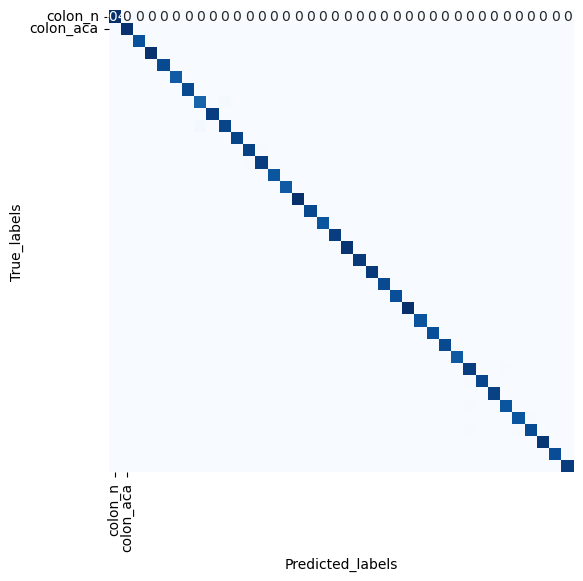

In [74]:

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_test,yhat_LR), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['colon_n', 'colon_aca'],yticklabels=['colon_n', 'colon_aca'])  
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
print(classification_report(y_test,yhat_LR))

# Random Forest

In [75]:
param_grid = {
'max_depth': [10,20,40,50,60],
  'criterion': ['gini', 'entropy']} 

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = SFold)
grid_search.fit(stackX_Train, y_train)

model_RF = grid_search.best_estimator_


scores_Train_RF = cross_validate(model_RF, stackX_Train, y_train, scoring=scoring,  cv=SFold)
RF_DIC_Train['Accurcy'].append(round(100*np.mean(scores_Train_RF['test_accuracy']), 2))
RF_DIC_Train['SDAccurcy'].append(round(100*np.std(scores_Train_RF['test_accuracy']), 2))


RF_DIC_Train['Precision'].append(round(100*np.mean(scores_Train_RF['test_precision']), 2))
RF_DIC_Train['SDPrecision'].append(round(100*np.std(scores_Train_RF['test_precision']), 2))


RF_DIC_Train['Recall'].append(round(100*np.mean(scores_Train_RF['test_recall']), 2))
RF_DIC_Train['SDRecall'].append(round(100*np.std(scores_Train_RF['test_recall']), 2))


RF_DIC_Train['F1'].append(round(100*np.mean(scores_Train_RF['test_f1_score']), 2))
RF_DIC_Train['SDF1'].append(round(100*np.std(scores_Train_RF['test_f1_score']), 2))



yhat_RF=cross_val_predict(model_RF, stackX_Test,y_test, cv=SFold)

RF_DIC['Accurcy'].append(round(100*accuracy_score(y_test, yhat_RF), 2))
RF_DIC['Precision'].append(round(100*precision_score(y_test, yhat_RF,average='weighted'), 2))
RF_DIC['Recall'].append(round(100*recall_score(y_test, yhat_RF, average='weighted'), 2))
RF_DIC['F1'].append(round(100*f1_score(y_test, yhat_RF, average='weighted') , 2))

In [77]:
print('RF Train')

# Create a DataFrame with a single row of the new data
new_train_row = pd.DataFrame([{
    'AccuracyTrain': round(np.mean(RF_DIC_Train['Accurcy']), 2),
    'PrecisionTrain': round(np.mean(RF_DIC_Train['Precision']), 2),
    'RecallTrain': round(np.mean(RF_DIC_Train['Recall']), 2),
    'F1Train': round(np.mean(RF_DIC_Train['F1']), 2)
}])

# Use pd.concat to add the row
finaltrain = pd.concat([finaltrain, new_train_row], ignore_index=True)

# Reindex the DataFrame columns
finaltrain = finaltrain.reindex(columns=['AccuracyTrain', 'PrecisionTrain', 'RecallTrain', 'F1Train'])

print(finaltrain)


RF Train
   AccuracyTrain  PrecisionTrain  RecallTrain  F1Train
0          99.86           99.86        99.86    99.86


In [79]:
print("SVM Test")

# Create a DataFrame with a single row for the new data
new_test_row = pd.DataFrame([{
    'AccuracyTest': round(np.mean(RF_DIC['Accurcy']), 2),
    'PrecisionTest': round(np.mean(RF_DIC['Precision']), 2),
    'RecallTest': round(np.mean(RF_DIC['Recall']), 2),
    'F1Test': round(np.mean(RF_DIC['F1']), 2)
}])

# Use pd.concat to add the row
ReultofTest = pd.concat([ReultofTest, new_test_row], ignore_index=True)

# Reindex the DataFrame columns
ReultofTest = ReultofTest.reindex(columns=['AccuracyTest', 'PrecisionTest', 'RecallTest', 'F1Test'])

print(ReultofTest)


SVM Test
   AccuracyTest  PrecisionTest  RecallTest  F1Test
0         99.76          99.76       99.76   99.76


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       497
           2       1.00      1.00      1.00       440
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       454
           5       1.00      1.00      1.00       421
           6       1.00      1.00      1.00       456
           7       0.98      0.98      0.98       410
           8       1.00      1.00      1.00       477
           9       0.99      0.98      0.98       477
          10       1.00      1.00      1.00       465
          11       1.00      1.00      1.00       472
          12       1.00      1.00      1.00       480
          13       1.00      1.00      1.00       430
          14       1.00      1.00      1.00       423
          15       1.00      1.00      1.00       503
          16       1.00      1.00      1.00       459
          17       1.00    

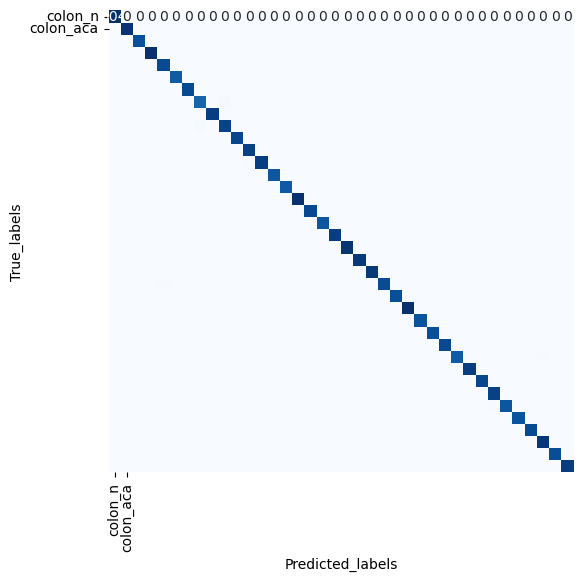

In [80]:

plt.figure(figsize=(6, 6))
hm = sns.heatmap(confusion_matrix(y_test,yhat_RF), annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['colon_n', 'colon_aca'],yticklabels=['colon_n', 'colon_aca'])  
hm.set(xlabel='Predicted_labels')
hm.set(ylabel='True_labels')
print(classification_report(y_test,yhat_RF))

In [81]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for each class
yhat_probs = model_RF.predict_proba(stackX_Test)

# Calculate AUROC with weighted average and one-vs-rest approach for multiclass
auroc = roc_auc_score(y_test, yhat_probs, multi_class="ovr", average="weighted")

print(f"AUROC: {auroc:.2f}")


AUROC: 1.00


550/550 ━━━━━━━━━━━━━━━━━━━━ 2435s 4s/step


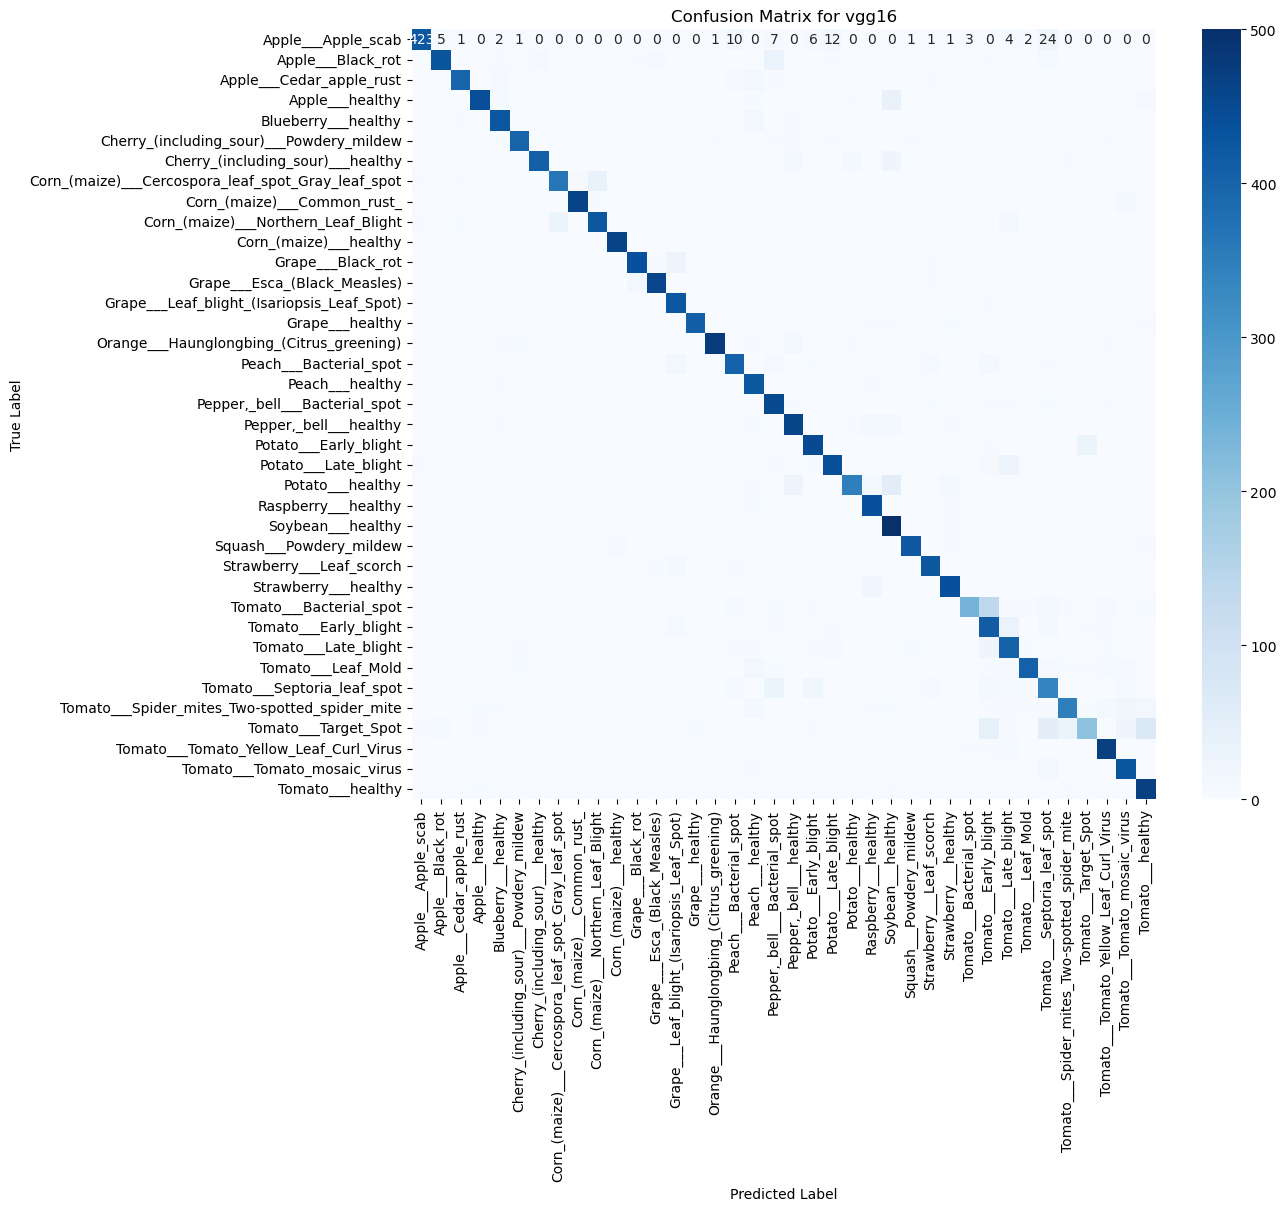

550/550 ━━━━━━━━━━━━━━━━━━━━ 2131s 4s/step


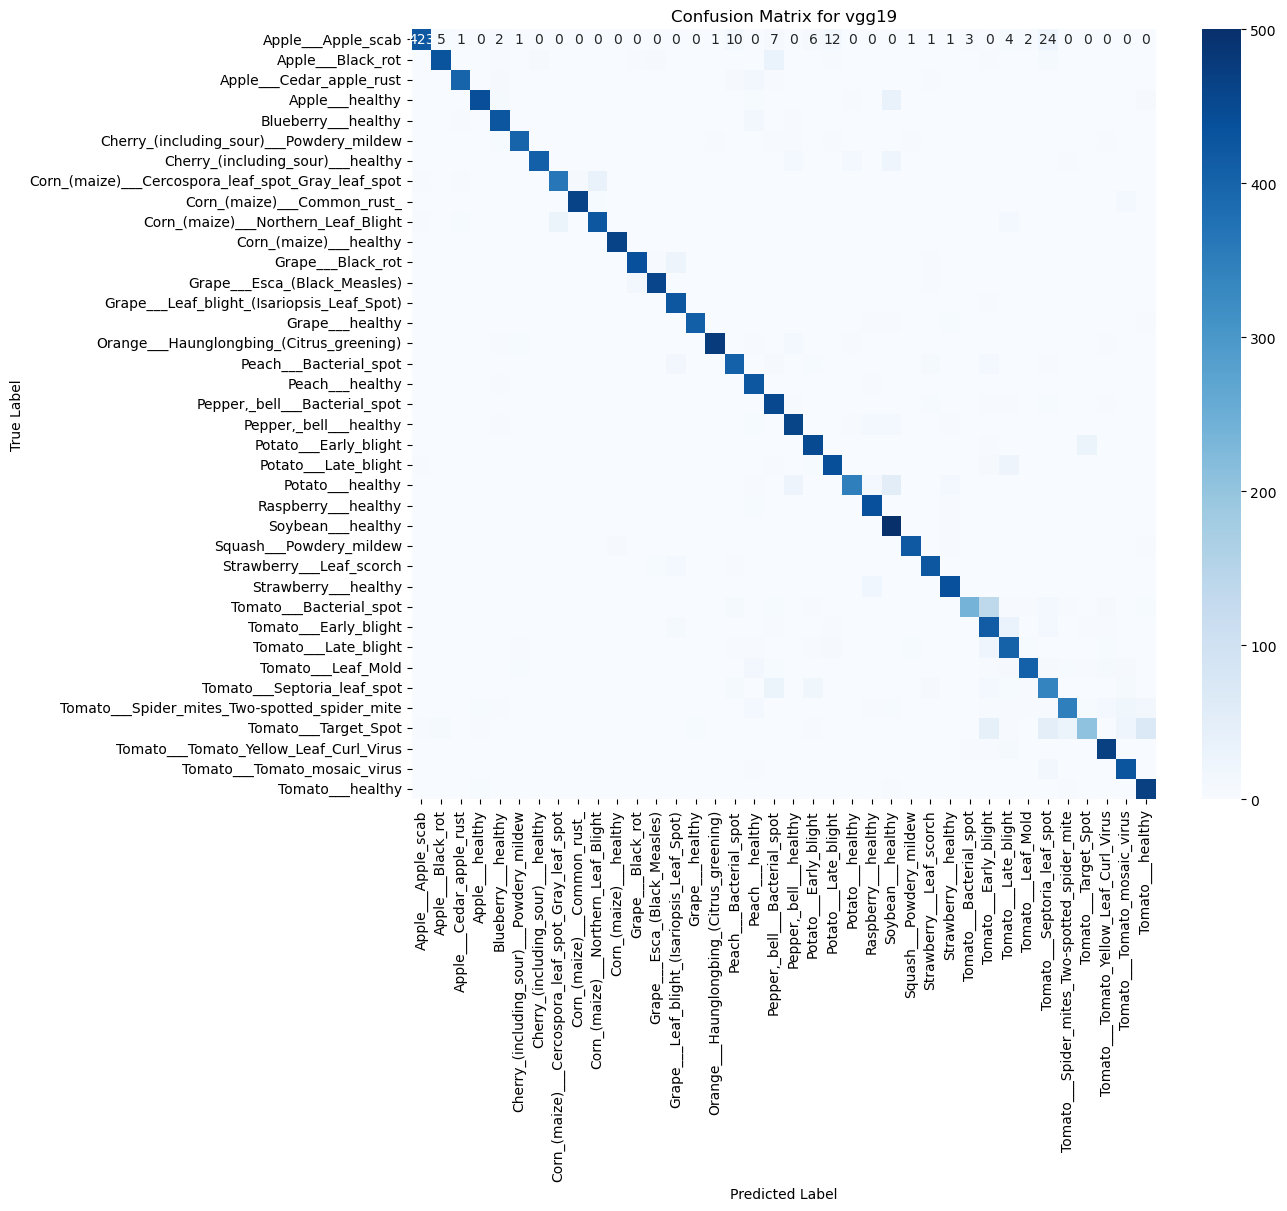

550/550 ━━━━━━━━━━━━━━━━━━━━ 777s 1s/step


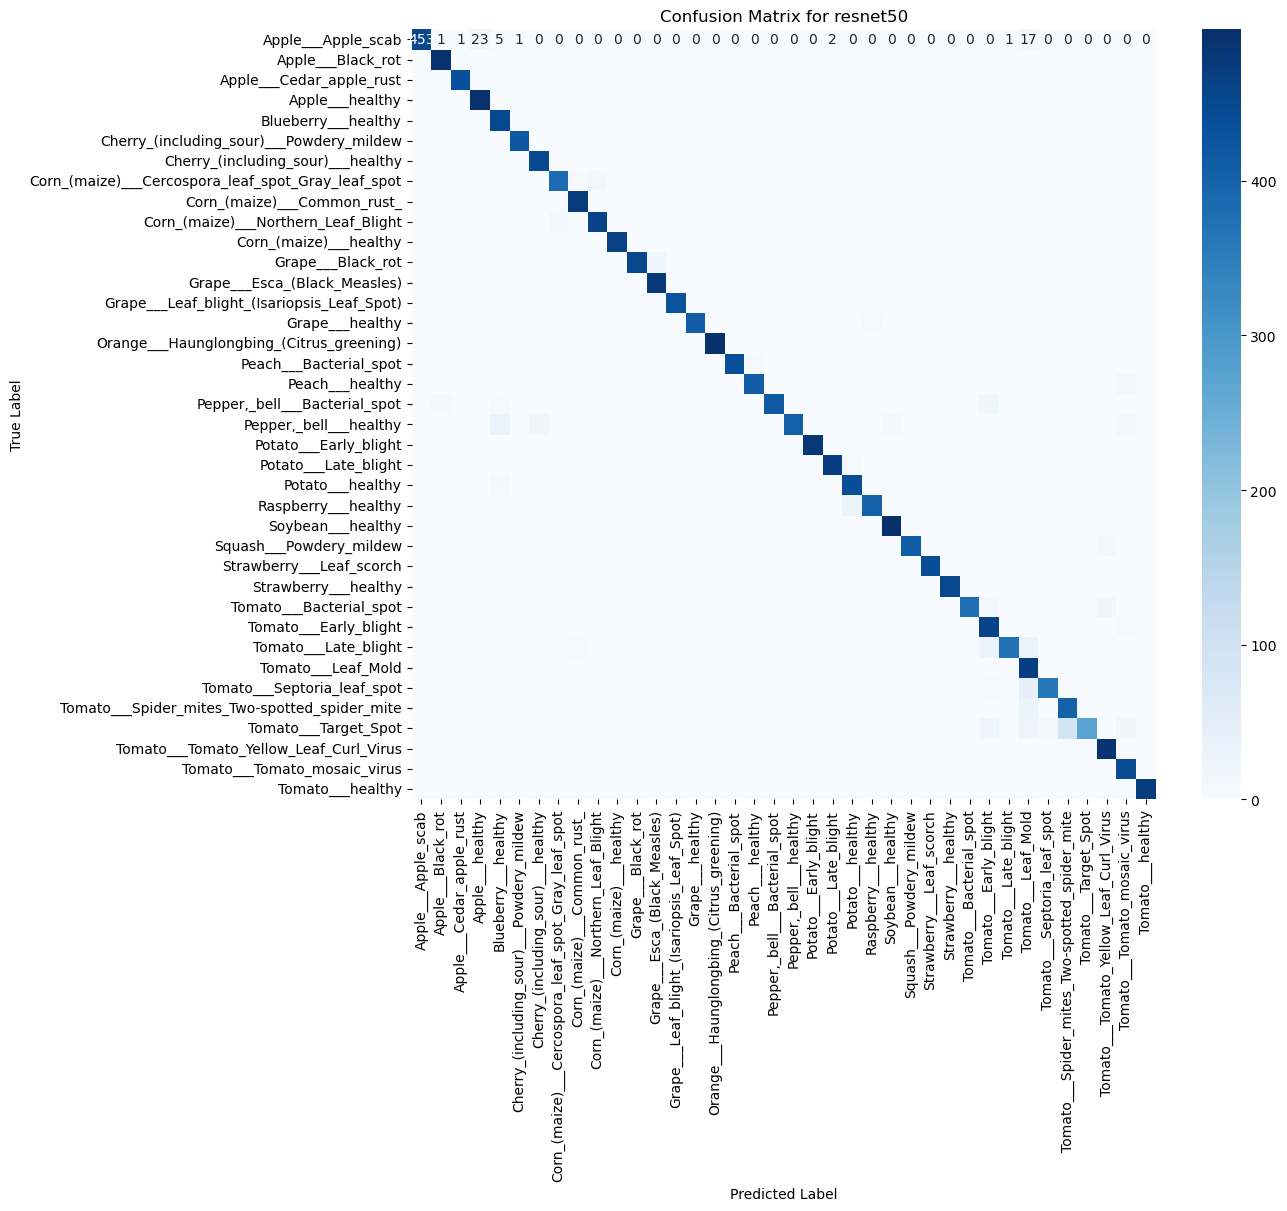

550/550 ━━━━━━━━━━━━━━━━━━━━ 1087s 2s/step


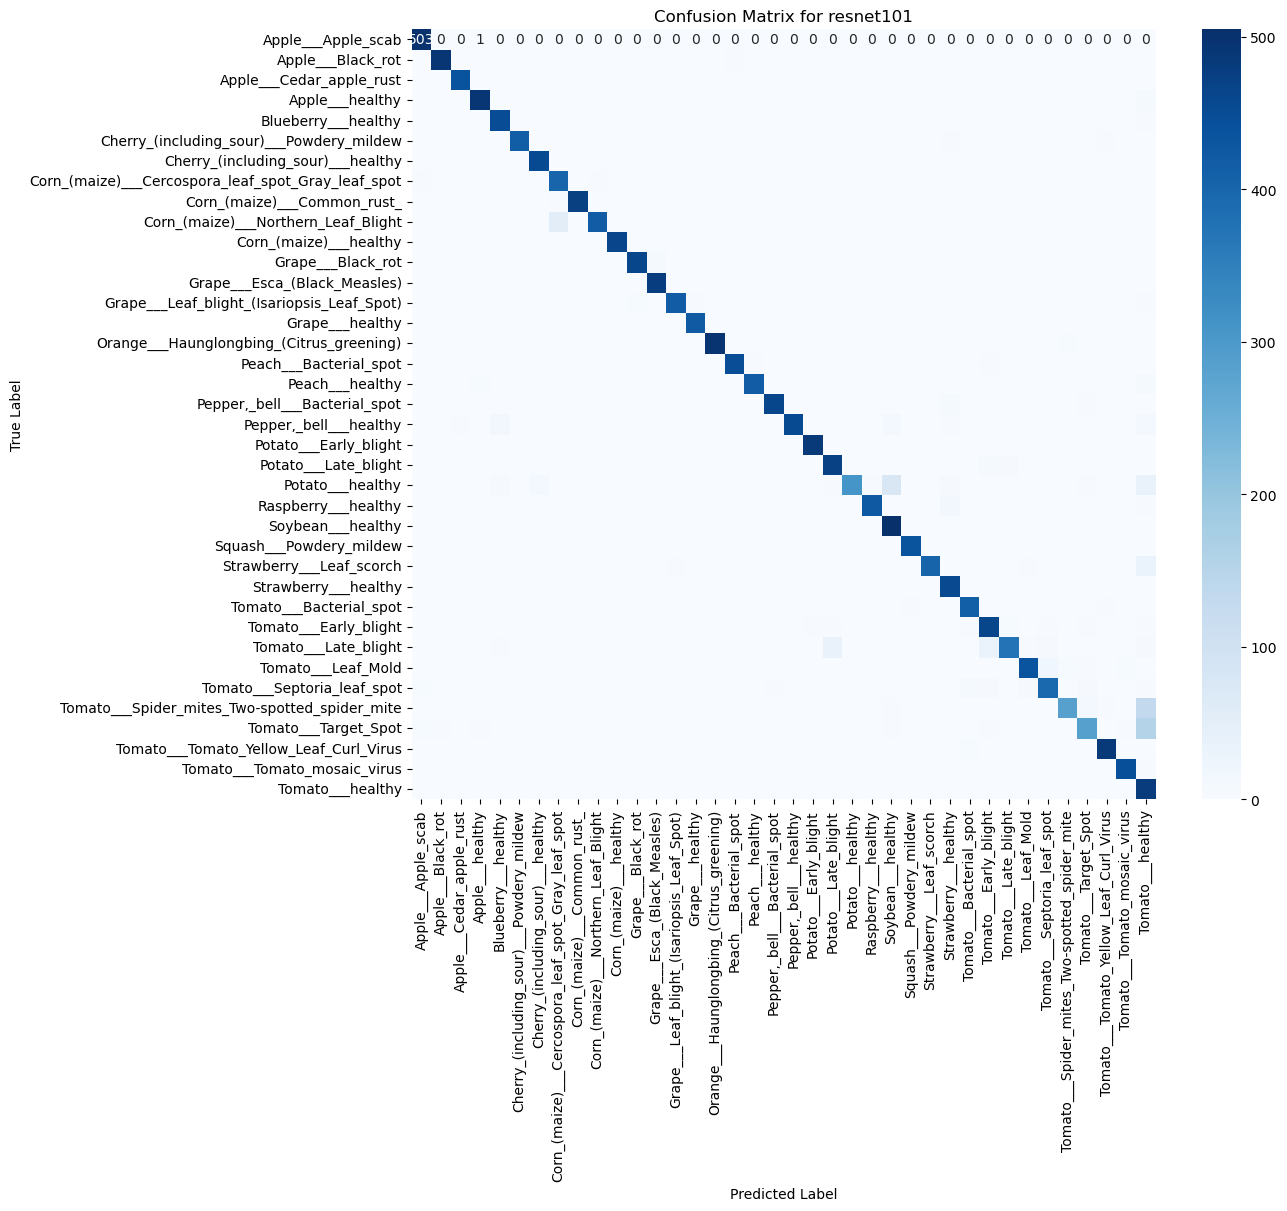

550/550 ━━━━━━━━━━━━━━━━━━━━ 334s 600ms/step


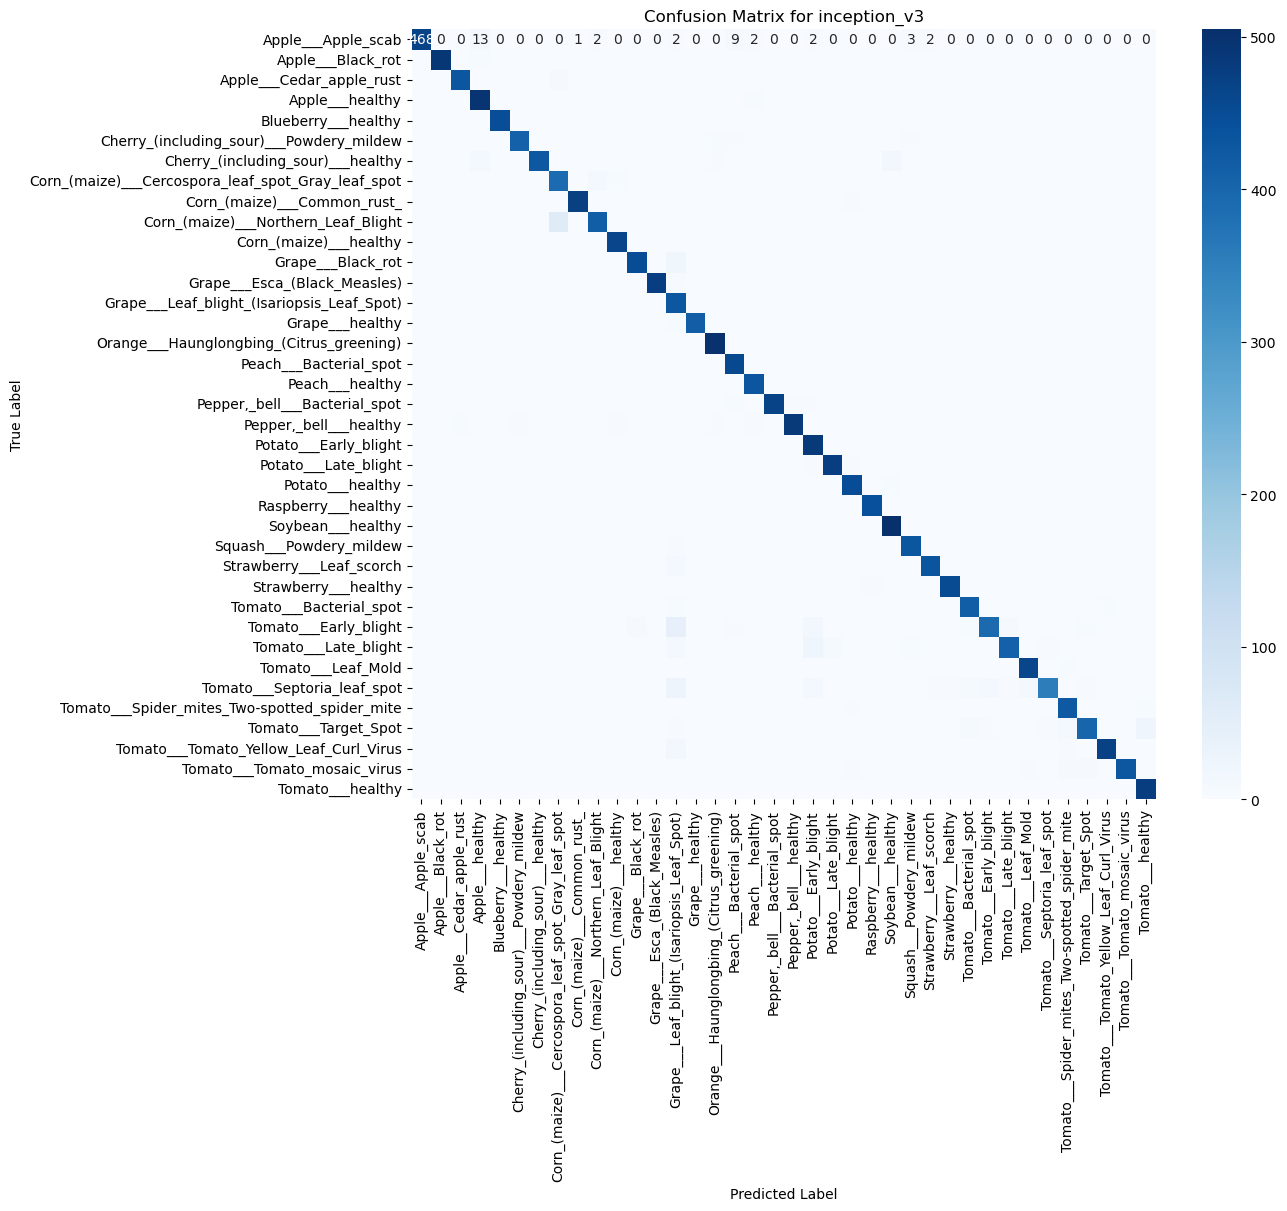

550/550 ━━━━━━━━━━━━━━━━━━━━ 458s 826ms/step


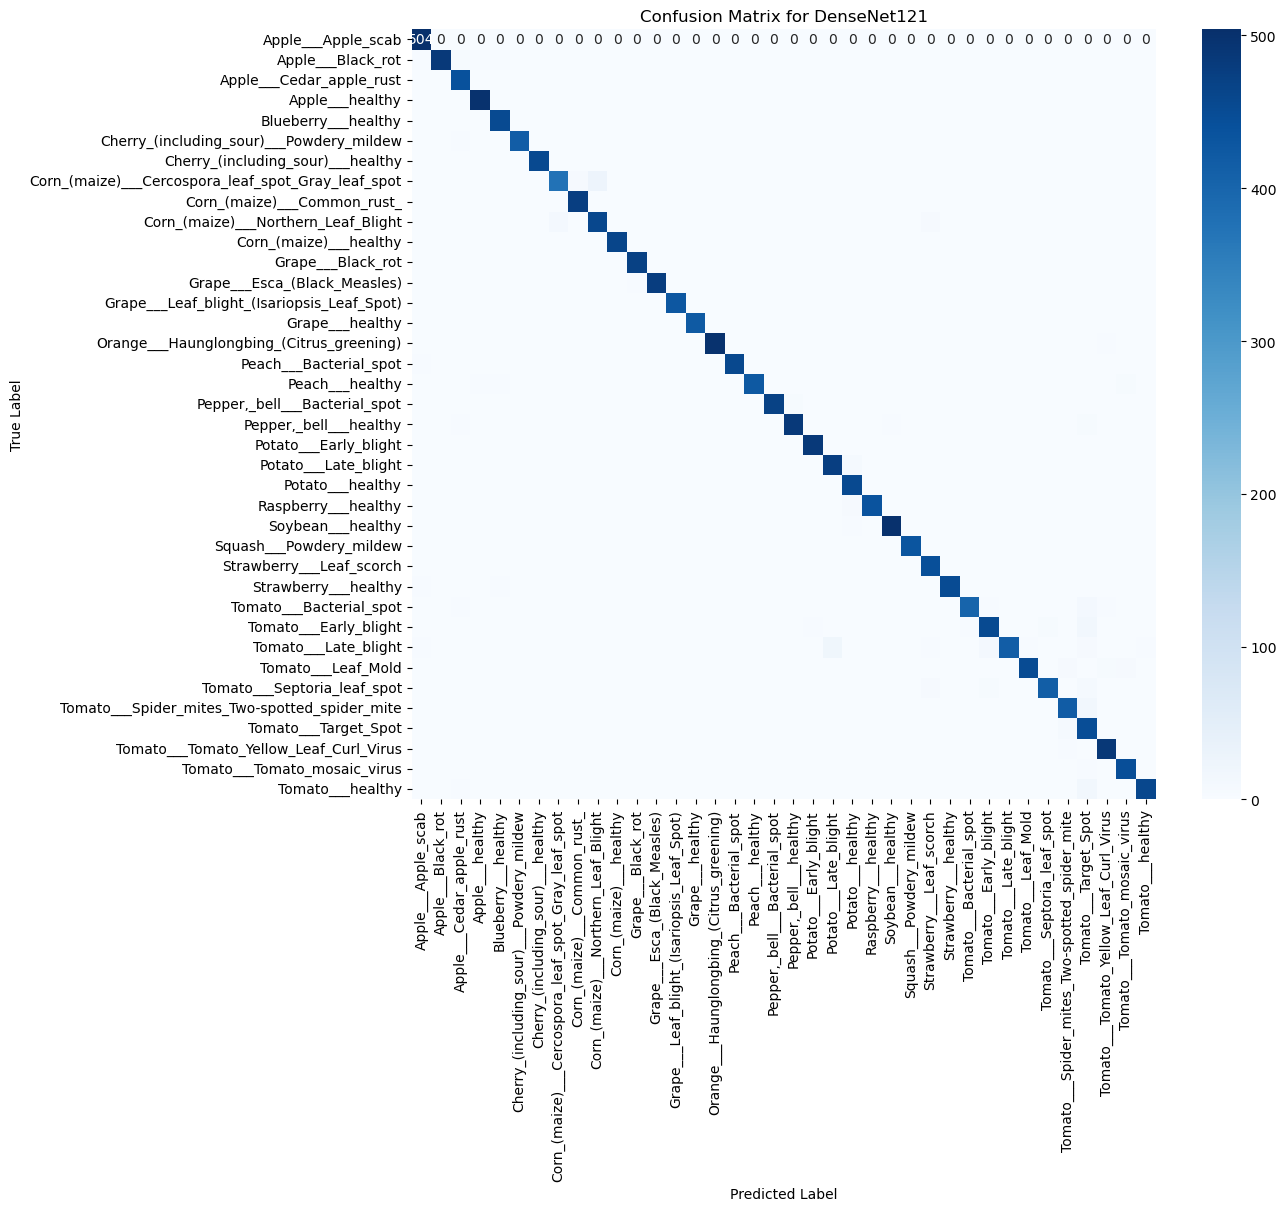

550/550 ━━━━━━━━━━━━━━━━━━━━ 535s 961ms/step


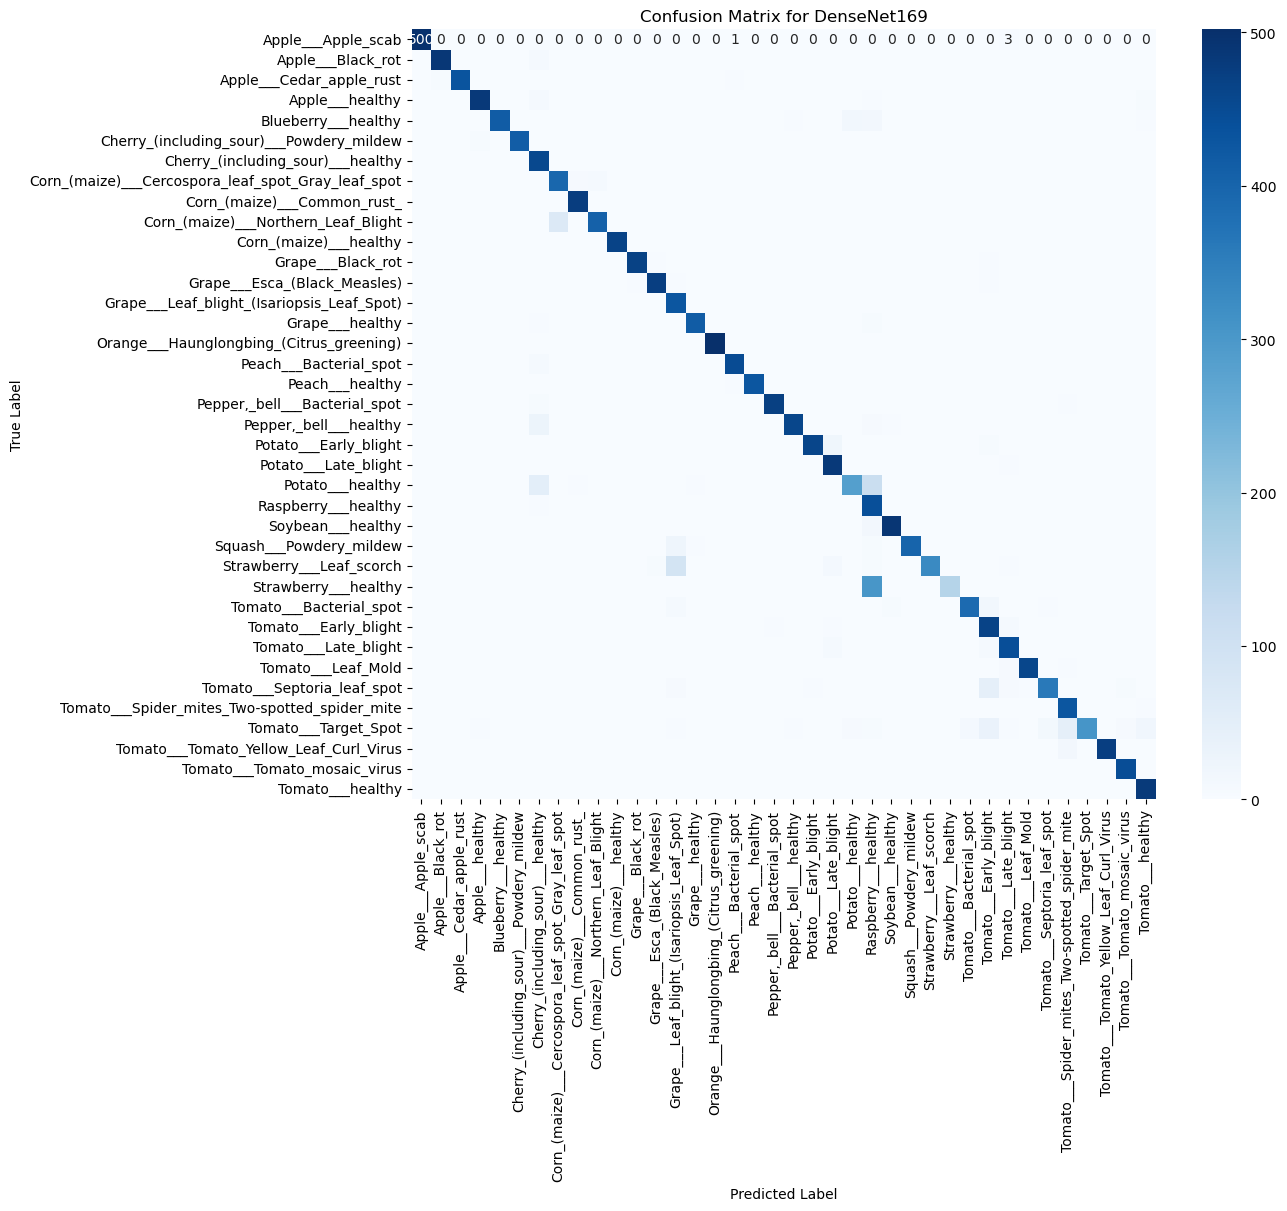

550/550 ━━━━━━━━━━━━━━━━━━━━ 476s 859ms/step


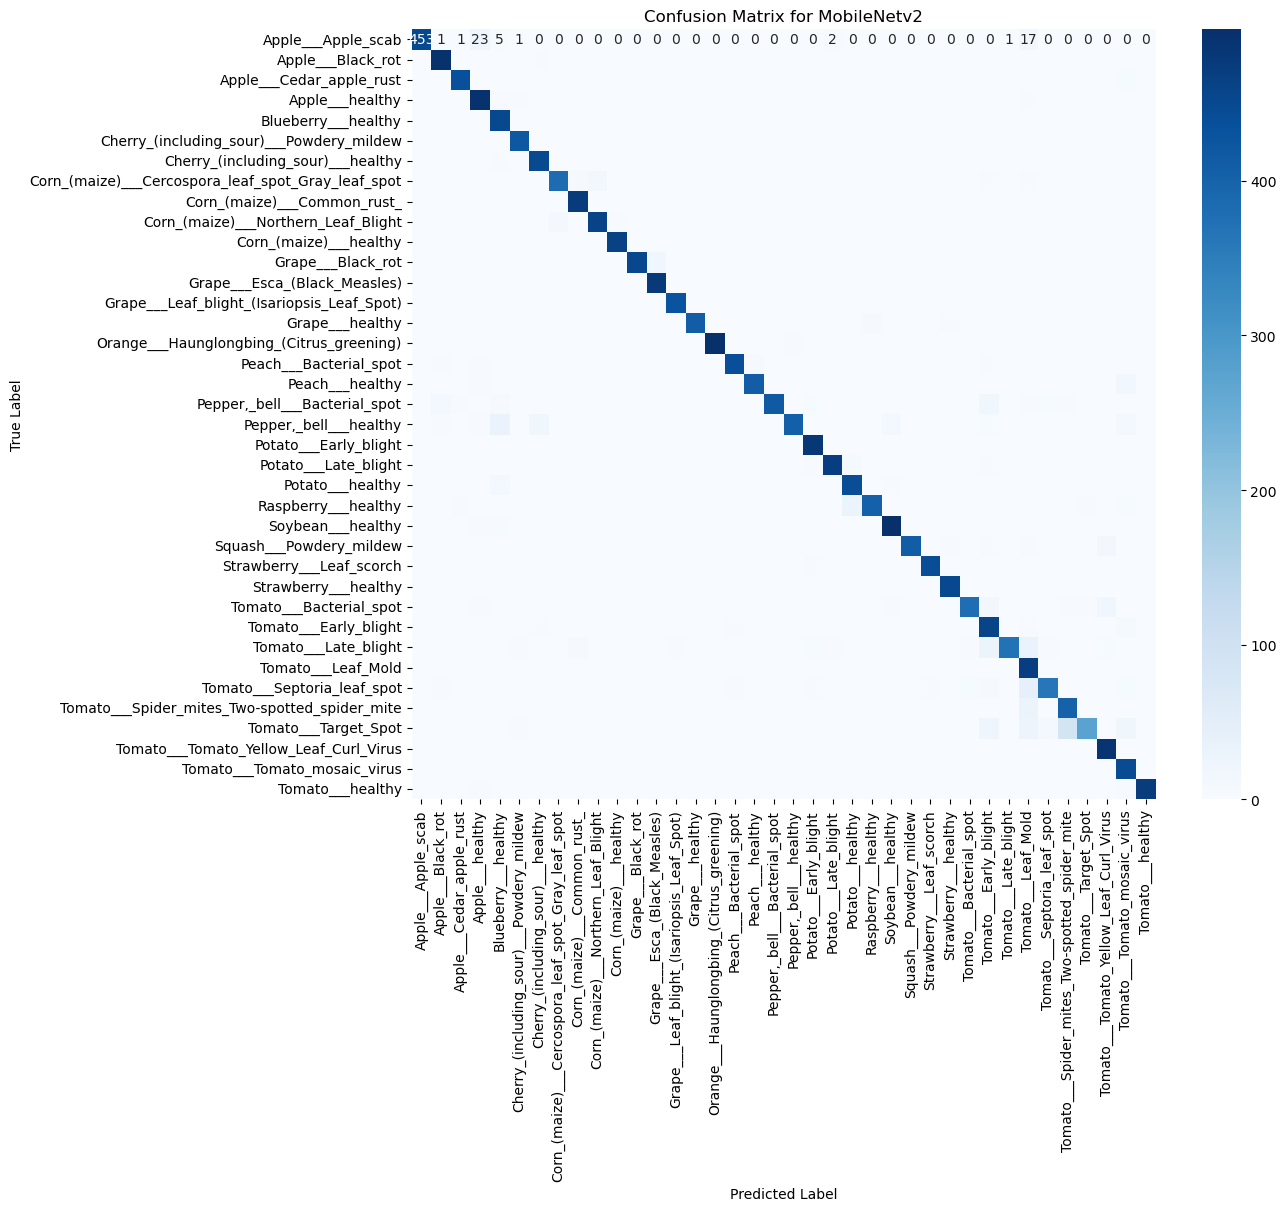

550/550 ━━━━━━━━━━━━━━━━━━━━ 114s 206ms/step


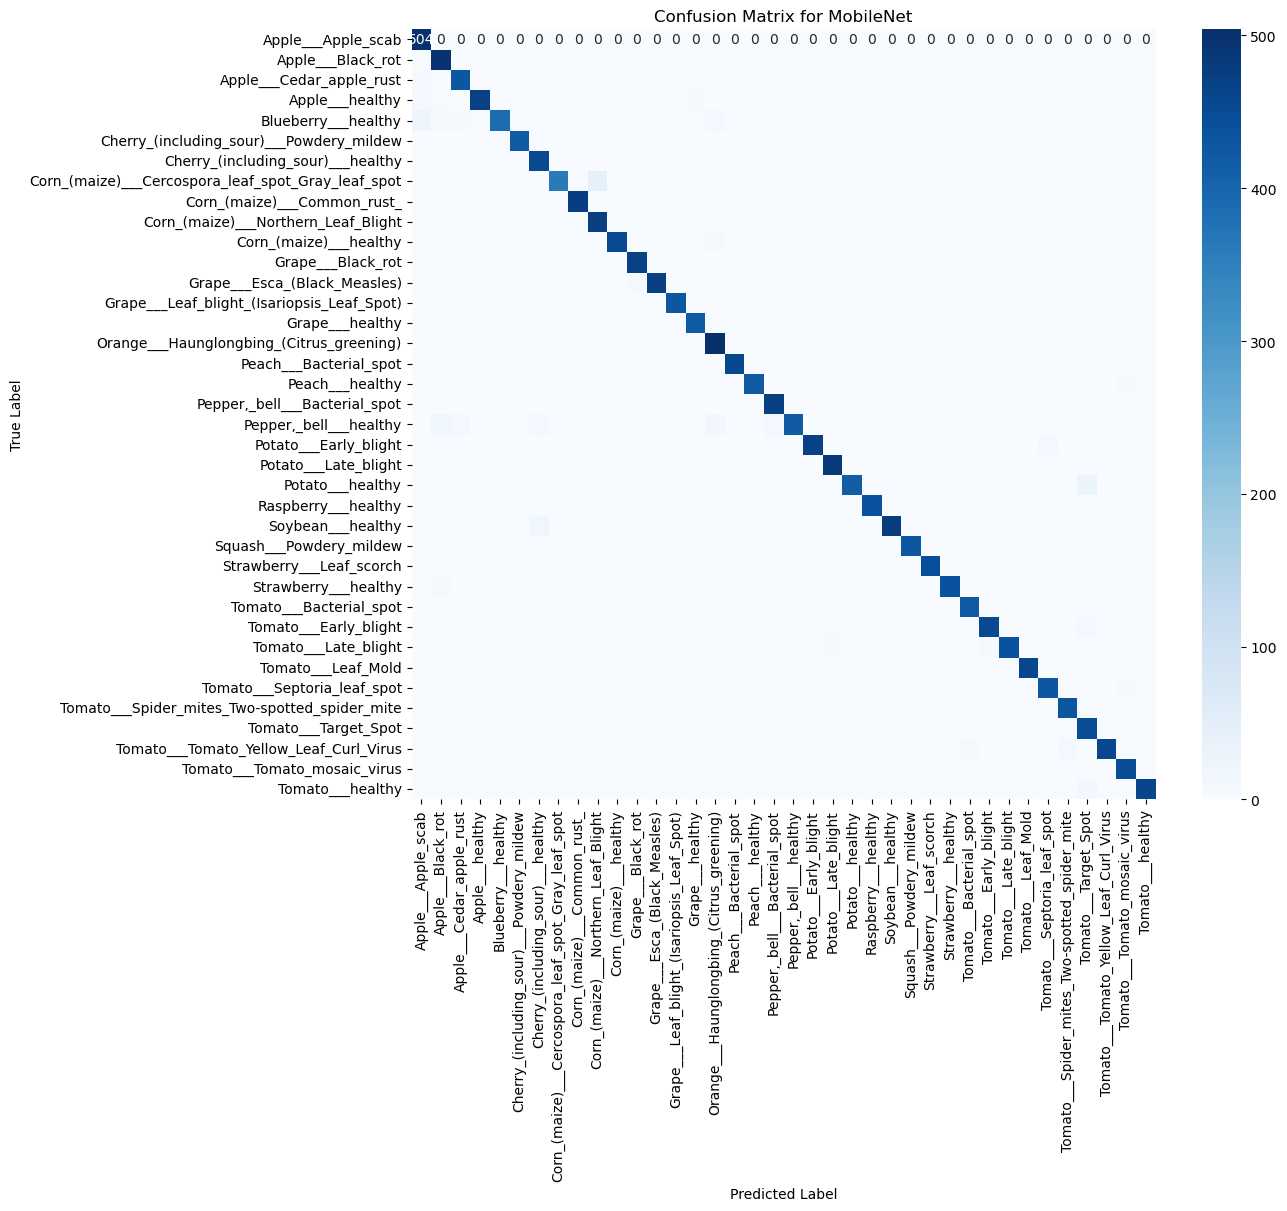

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define your classes dictionary
classes = {
    'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3,
    'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6,
    'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8,
    'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11,
    'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14,
    'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17,
    'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20,
    'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24,
    'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27,
    'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30,
    'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32,
    'Tomato___Spider_mites_Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37
}

# Extract the class labels from the classes dictionary
class_labels = list(classes.keys())

# Number of classes
n_classes = len(classes)

# List of model names and loaded models
model_names = ['vgg16','vgg19','resnet50','resnet101',
         'inception_v3', 'DenseNet121','DenseNet169',
         'MobileNetv2','MobileNet']
models = [
    model_vgg16,model_vgg19,model_resnet50,model_resnet101,
         model_inception_v3, model_DenseNet121,model_DenseNet169,
         model_MobileNetv2,model_MobileNet
]

# Convert y_test to label format if it’s one-hot encoded
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # Already in label format

# Plotting Confusion Matrix for each model
for model_name, model in zip(model_names, models):
    # Get predicted class labels
    y_pred_prob = model.predict(X_test)  # Replace x_test with your test data
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()


550/550 ━━━━━━━━━━━━━━━━━━━━ 2473s 4s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 2267s 4s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 780s 1s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1340s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 622s 1s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 867s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 914s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 257s 466ms/step


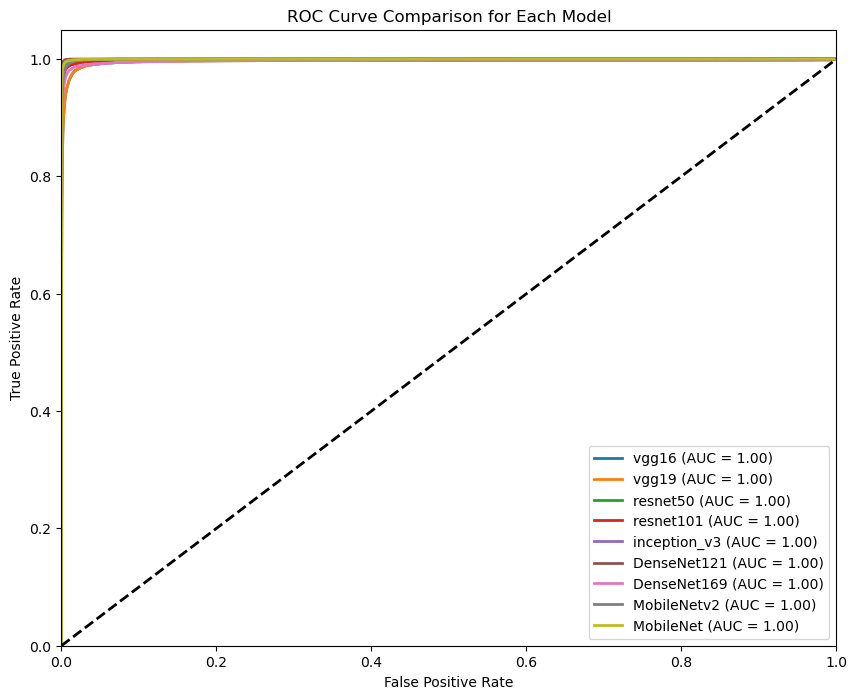

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Number of classes
n_classes = 38

# List of model names and loaded models
model_names = ['vgg16','vgg19','resnet50','resnet101',
         'inception_v3', 'DenseNet121','DenseNet169',
         'MobileNetv2','MobileNet']
models = [
    model_vgg16,model_vgg19,model_resnet50,model_resnet101,
         model_inception_v3, model_DenseNet121,model_DenseNet169,
         model_MobileNetv2,model_MobileNet
]


# Convert y_test to one-hot encoded if it’s not already
if len(y_test.shape) == 1:  # Assuming y_test is not one-hot encoded
    y_test = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize plot
plt.figure(figsize=(10, 8))

# Plotting ROC for each model
for model_name, model in zip(model_names, models):
    # Predict probabilities for each class
    y_score = model.predict(X_test)  # Replace x_test with your test data
    
    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot single ROC curve for the model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Each Model')
plt.legend(loc="lower right")
plt.show()


550/550 ━━━━━━━━━━━━━━━━━━━━ 2149s 4s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1335s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 949s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1786s 3s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 996s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 1048s 2s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 628s 1s/step
550/550 ━━━━━━━━━━━━━━━━━━━━ 109s 198ms/step


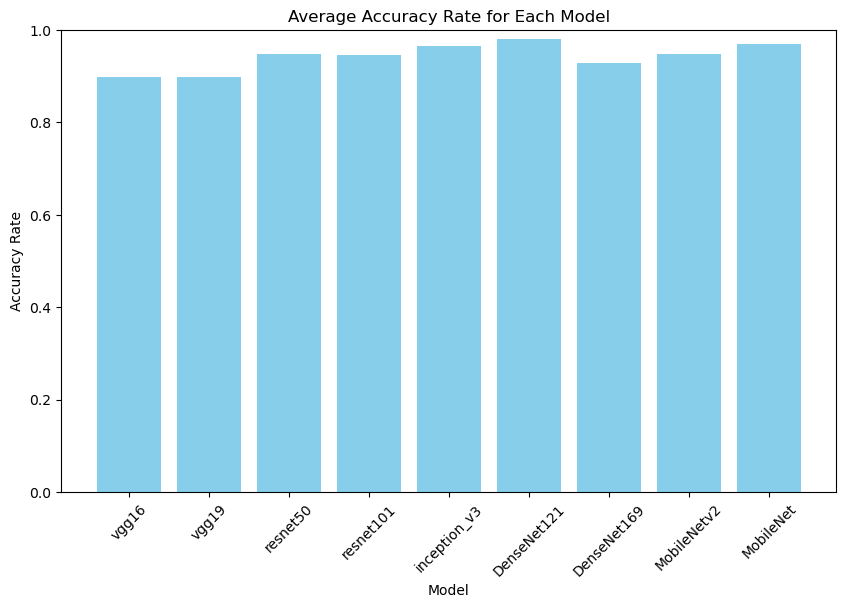

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# List of model names and loaded models
model_names = ['vgg16','vgg19','resnet50','resnet101',
         'inception_v3', 'DenseNet121','DenseNet169',
         'MobileNetv2','MobileNet']
models = [
    model_vgg16,model_vgg19,model_resnet50,model_resnet101,
         model_inception_v3, model_DenseNet121,model_DenseNet169,
         model_MobileNetv2,model_MobileNet
]


# Convert y_test to label format if it’s one-hot encoded
if len(y_test.shape) > 1:  # If y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # Already in label format

# Initialize a list to store accuracy scores
accuracy_scores = []

# Compute accuracy for each model
for model_name, model in zip(model_names, models):
    y_pred_prob = model.predict(X_test)  # Replace x_test with your test data
    y_pred_labels = np.argmax(y_pred_prob, axis=1)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    accuracy_scores.append(accuracy)

# Plotting the average accuracy rates
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Rate')
plt.title('Average Accuracy Rate for Each Model')
plt.ylim([0, 1])  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45)
plt.show()


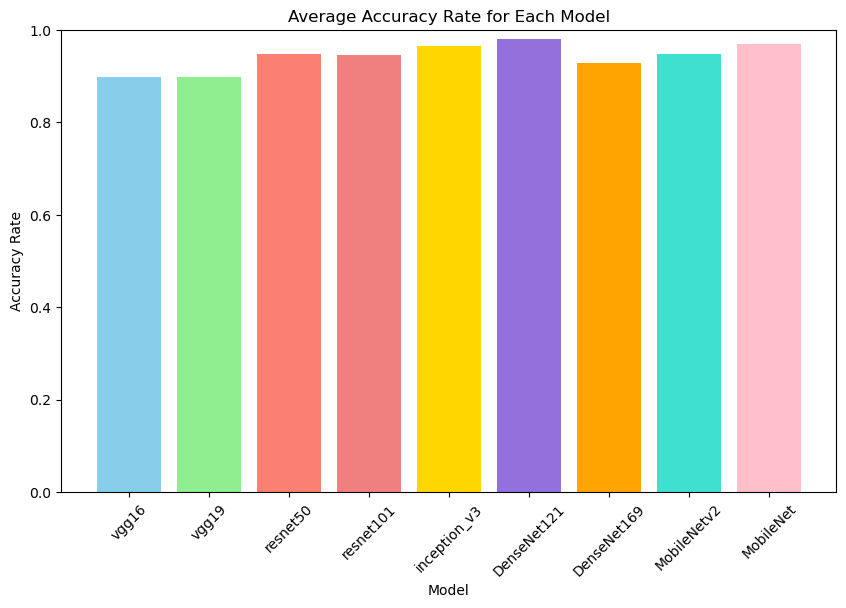

In [94]:
# Define a list of different colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 
          'mediumpurple', 'orange', 'turquoise', 'pink']

# Plotting the average accuracy rates with different colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy Rate')
plt.title('Average Accuracy Rate for Each Model')
plt.ylim([0, 1])  # Accuracy ranges between 0 and 1
plt.xticks(rotation=45)
plt.show()


In [93]:
import matplotlib.pyplot as plt

# Dictionary to store the history of each model
histories = {}

# Assume `x_train`, `y_train`, `x_val`, and `y_val` are your training and validation datasets
# Replace with actual data variables if different
for name, model in members.items():
    print(f"Training model: {name}")
    history = model.fit(
        X_train, y_train,
        epochs=20,  # Set the number of epochs as needed
        validation_data=(X_test, y_test),  # Assuming you have a validation set
        batch_size=32,  # Adjust batch size as needed
        verbose=1
    )
    histories[name] = history

# Plotting Accuracy for Each Model
plt.figure(figsize=(14, 8))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], linestyle="--", label=f'{name} Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Each Model')
plt.legend(loc="lower right")
plt.show()

# Plotting Loss for Each Model
plt.figure(figsize=(14, 8))
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Train Loss')
    plt.plot(history.history['val_loss'], linestyle="--", label=f'{name} Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Each Model')
plt.legend(loc="upper right")
plt.show()


Training model: vgg16
Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 38)

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming models are trained
models = {'SVM': model_SVM, 'Logistic Regression': LR, 'Random Forest': model_RF}

# List of 38 classes (as per your dataset)
n_classes = 38  # Total number of classes
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)  # Flatten the 2D images to 1D vectors

# Now use X_test_reshaped with your SVC model
y_pred_decision = model_SVM.decision_function(X_test_reshaped)
# Binarize the output for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize plot
plt.figure(figsize=(10, 8))

# Colors for the ROC curves of each model
colors = ['blue', 'green', 'red']

# Iterate through the models and plot ROC for each
for i, (model_name, model) in enumerate(models.items()):
    if model_name == 'SVM':
        # Use decision_function for SVM instead of predict_proba
        y_pred_decision = model.decision_function(X_test)  # Get decision values

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_pred_decision[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_decision.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot the ROC curve (micro-average) for the current model
        plt.plot(fpr["micro"], tpr["micro"], color=colors[i], lw=2,
                 label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')
    else:
        # For Logistic Regression and Random Forest
        y_pred_prob = model.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for j in range(n_classes):
            fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_pred_prob[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot the ROC curve (micro-average) for the current model
        plt.plot(fpr["micro"], tpr["micro"], color=colors[i], lw=2,
                 label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

# Plot diagonal line (random chance)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


ValueError: X has 150528 features, but SVC is expecting 342 features as input.